# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [14]:
 A + B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [15]:
 A * B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [24]:
 A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import seaborn as sns

/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc

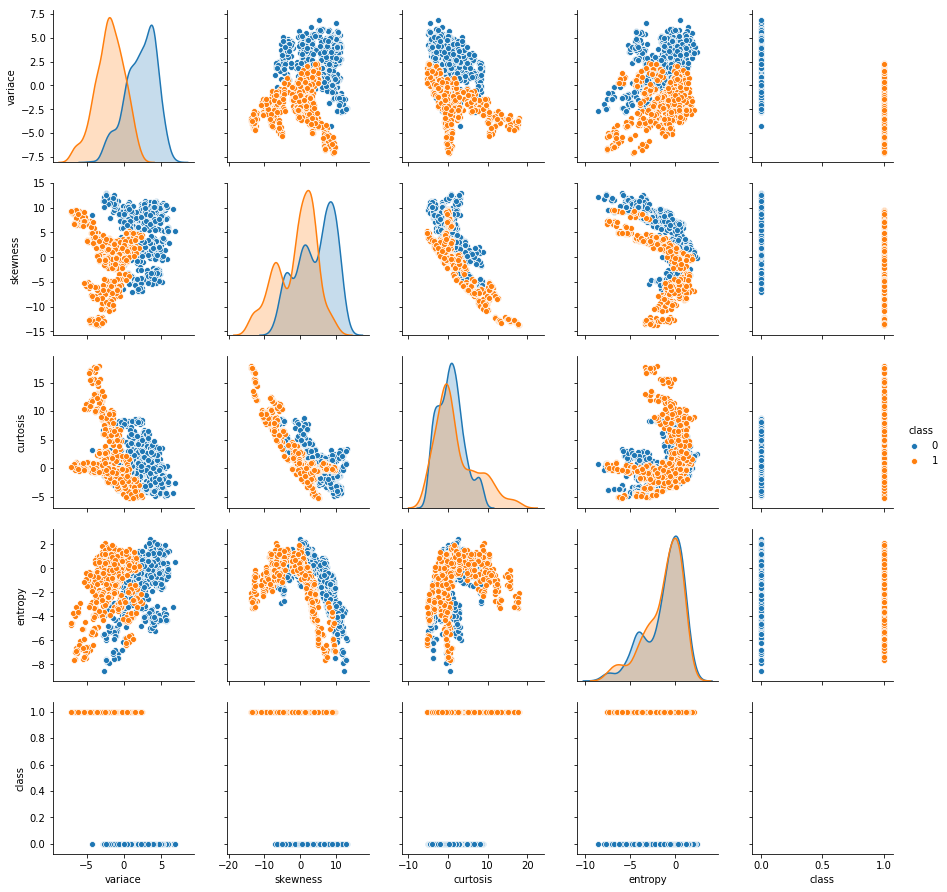

In [29]:
sns.pairplot(df, hue="class")

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in 

array([0.99344978, 0.99124726, 0.99562363])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [38]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 1s 533us/step - loss: 0.7248 - acc: 0.5021
Epoch 2/10
960/960 [==============================] - 0s 126us/step - loss: 0.6666 - acc: 0.5792
Epoch 3/10
960/960 [==============================] - 0s 270us/step - loss: 0.6185 - acc: 0.6729
Epoch 4/10
960/960 [==============================] - 0s 295us/step - loss: 0.5788 - acc: 0.7312
Epoch 5/10
960/960 [==============================] - 0s 149us/step - loss: 0.5457 - acc: 0.7635
Epoch 6/10
960/960 [==============================] - 0s 68us/step - loss: 0.5177 - acc: 0.8062
Epoch 7/10
960/960 [==============================] - 0s 70us/step - loss: 0.4938 - acc: 0.8271
Epoch 8/10
960/960 [==============================] - 0s 68us/step - loss: 0.4732 - acc: 0.8458
Epoch 9/10
960/960 [==============================] - 0s 172us/step - loss: 0.4552 - acc: 0.8604
Epoch 10/10
412/412 [==============================] - 0s 250us/step


In [39]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 89.8 %')

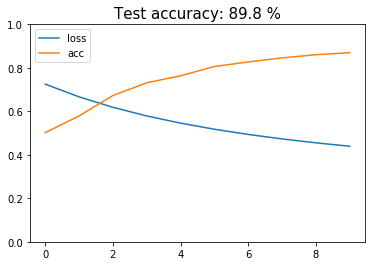

In [40]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [47]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [48]:
historydf = pd.concat(dflist, axis=1)

In [49]:
historydf

,loss,acc,loss,acc,loss,acc,loss,acc
0,0.917290,0.142708,0.607040,0.666667,0.474104,0.810417,0.204778,0.961458
1,0.763589,0.333333,0.411873,0.862500,0.302315,0.914583,0.112411,0.968750
2,0.665684,0.587500,0.336809,0.906250,0.236868,0.937500,0.088877,0.975000
3,0.599250,0.707292,0.290135,0.920833,0.197450,0.954167,0.076829,0.979167
4,0.550771,0.742708,0.256678,0.928125,0.170953,0.961458,0.068836,0.979167
5,0.513236,0.763542,0.231104,0.936458,0.151958,0.963542,0.063797,0.980208
6,0.482719,0.780208,0.210754,0.945833,0.137854,0.966667,0.059692,0.980208
7,0.457172,0.794792,0.194219,0.953125,0.126801,0.968750,0.056373,0.981250
8,0.435256,0.807292,0.180500,0.954167,0.118029,0.968750,0.054109,0.981250
9,0.416012,0.819792,0.168965,0.954167,0.110804,0.970833,0.051916,0.981250


In [50]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [51]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss       acc      loss       acc      loss       acc   
0              0.917290  0.142708  0.607040  0.666667  0.474104  0.810417   
1              0.763589  0.333333  0.411873  0.862500  0.302315  0.914583   
2              0.665684  0.587500  0.336809  0.906250  0.236868  0.937500   
3              0.599250  0.707292  0.290135  0.920833  0.197450  0.954167   
4              0.550771  0.742708  0.256678  0.928125  0.170953  0.961458   
5              0.513236  0.763542  0.231104  0.936458  0.151958  0.963542   
6              0.482719  0.780208  0.210754  0.945833  0.137854  0.966667   
7              0.457172  0.794792  0.194219  0.953125  0.126801  0.968750   
8              0.435256  0.807292  0.180500  0.954167  0.118029  0.968750   
9              0.416012  0.819792  0.168965  0.954167  0.110804  0.970833   

learning_rate      0.50            
metric             loss       acc  
0              0.204778  0.961458  
1              0.112411  0.968750  
2              0.088877  0.975000  
3              0.076829  0.979167  
4              0.068836  0.979167  
5              0.063797  0.980208  
6              0.059692  0.980208  
7              0.056373  0.981250  
8              0.054109  0.981250  
9              0.051916  0.981250

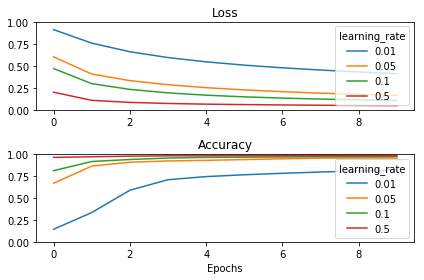

In [52]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [57]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0  , epochs=10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [58]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [59]:
historydf

batch_size       16                  32                  64             \
metric          loss       acc      loss       acc      loss       acc   
0           0.471434  0.753125  1.087157  0.310417  0.841289  0.457292   
1           0.427162  0.804167  0.960167  0.351042  0.815841  0.466667   
2           0.392846  0.832292  0.856511  0.408333  0.791871  0.477083   
3           0.365965  0.856250  0.773463  0.465625  0.769342  0.482292   
4           0.344551  0.867708  0.707187  0.538542  0.748115  0.494792   
5           0.327104  0.882292  0.654139  0.583333  0.728197  0.516667   
6           0.312682  0.890625  0.611160  0.630208  0.709452  0.542708   
7           0.300468  0.900000  0.575730  0.695833  0.691832  0.558333   
8           0.289880  0.904167  0.546090  0.738542  0.675267  0.575000   
9           0.280595  0.903125  0.520917  0.765625  0.659659  0.587500   

batch_size       128            
metric          loss       acc  
0           0.973590  0.285417  
1           0.947434  0.295833  
2           0.922585  0.308333  
3           0.898939  0.332292  
4           0.876454  0.348958  
5           0.855012  0.375000  
6           0.834775  0.397917  
7           0.815511  0.417708  
8           0.797254  0.436458  
9           0.779908  0.451042

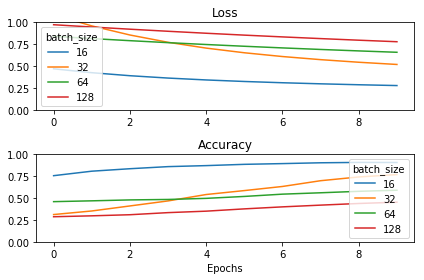

In [60]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [61]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [62]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [63]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

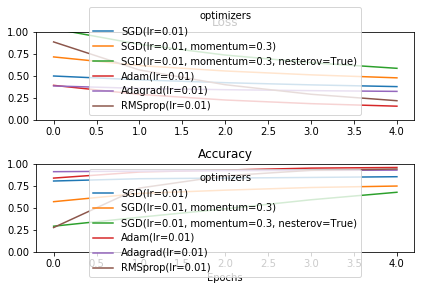

In [64]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [80]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [81]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

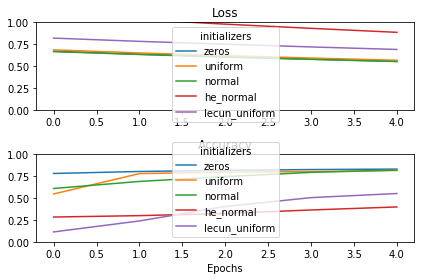

In [82]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [87]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 1s 1ms/step - loss: 0.5968 - acc: 0.8036 - val_loss: 0.4862 - val_acc: 0.9201
Epoch 2/20
672/672 [==============================] - 0s 145us/step - loss: 0.3951 - acc: 0.9301 - val_loss: 0.3146 - val_acc: 0.9306
Epoch 3/20
672/672 [==============================] - 0s 158us/step - loss: 0.2491 - acc: 0.9390 - val_loss: 0.1941 - val_acc: 0.9514
Epoch 4/20
672/672 [==============================] - 0s 414us/step - loss: 0.1559 - acc: 0.9524 - val_loss: 0.1250 - val_acc: 0.9618
Epoch 5/20
672/672 [==============================] - 0s 369us/step - loss: 0.1088 - acc: 0.9568 - val_loss: 0.0819 - val_acc: 0.9757
Epoch 6/20
672/672 [==============================] - 1s 978us/step - loss: 0.0764 - acc: 0.9658 - val_loss: 0.0565 - val_acc: 0.9826
Epoch 7/20
672/672 [==============================] - 0s 321us/step - loss: 0.0566 - acc: 0.9762 - val_loss: 0.0421 - val_acc: 0.9826
Epoch 8/20
672/672

In [88]:
result

[0.028976030900929737, 0.9878640776699029]

In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.layers

In [91]:
inp = model.layers[0].input
out = model.layers[0].output

In [92]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [93]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [94]:
features_function = K.function([inp], [out])

In [95]:
features_function

In [96]:
features_function([X_test])[0].shape

(412, 2)

In [97]:
features = features_function([X_test])[0]

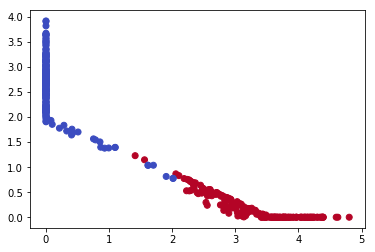

In [98]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [101]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 302us/step


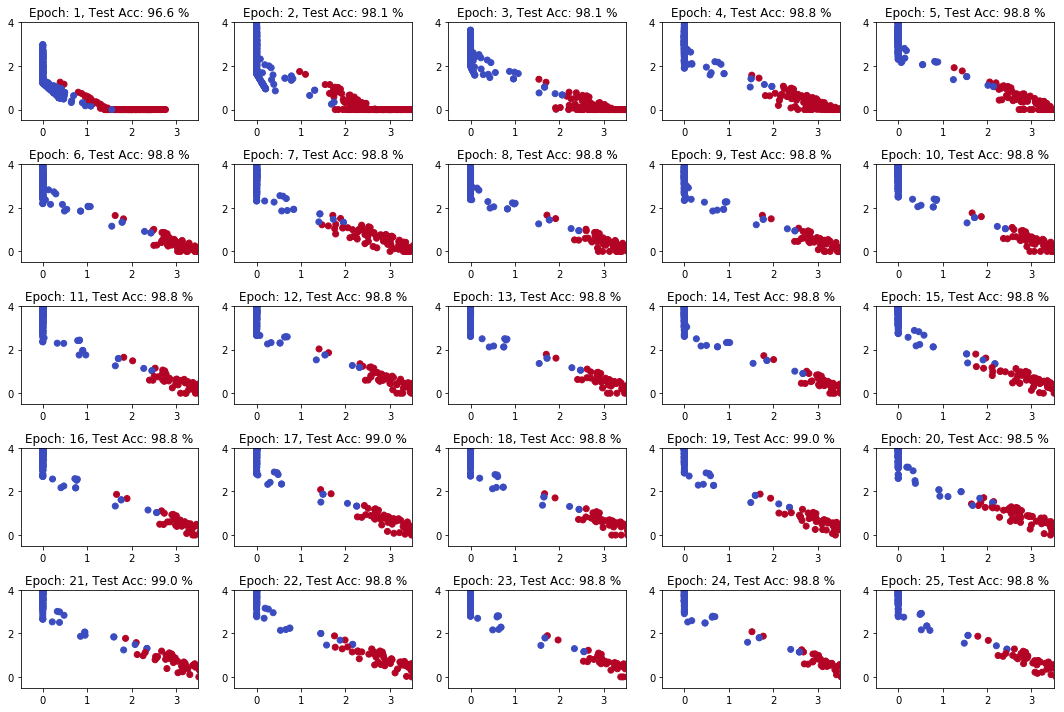

In [102]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [103]:
df = pd.read_csv("../data/wines.csv")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280-OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [ ]:
# There are no nulls in any of the columns

In [105]:
df["Class"].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [ ]:
# Multi class classification with 

/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc

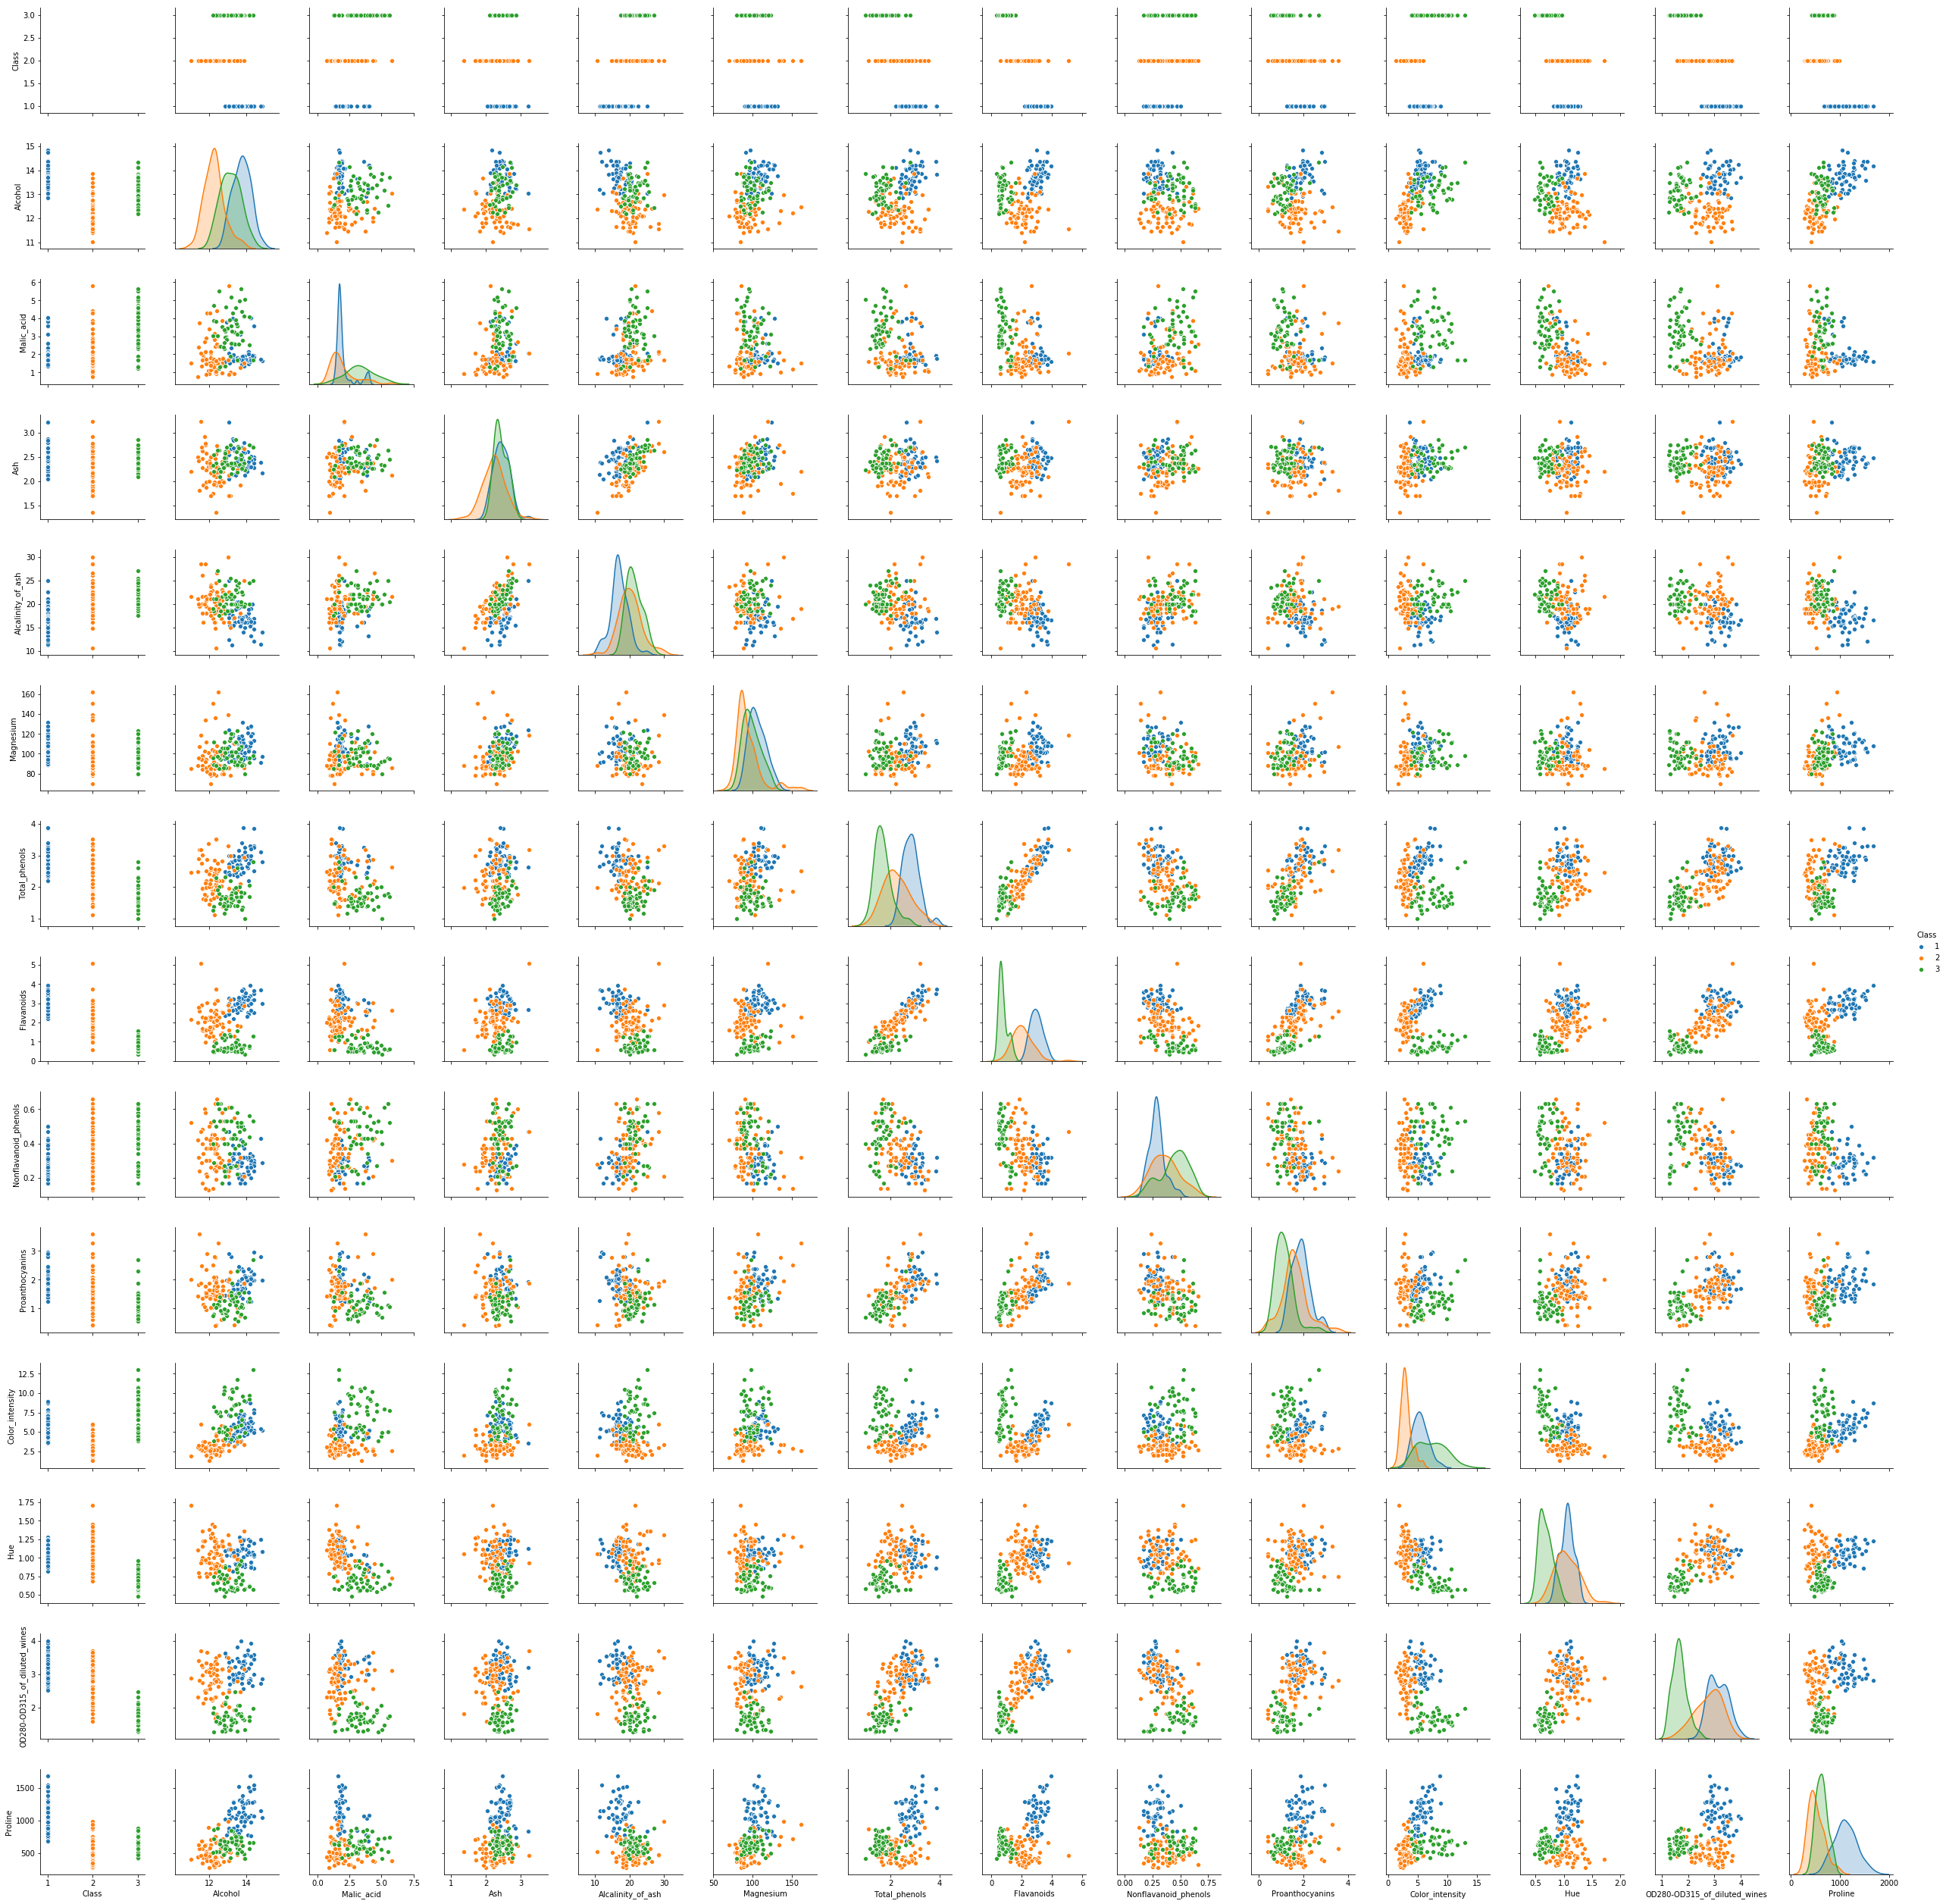

In [106]:
sns.pairplot(df, hue="Class")

In [107]:
# There are no categorical variables which need encoding

In [108]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [114]:
# All of the dependent variables need scaling as they are on entirely different scales

In [115]:
X = df.drop("Class", axis=1)
y = df["Class"].values

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X.values)

In [123]:
# Multi class classification so need to use "categorical_cross_entropy" as the scoring function with a softmax outer layer
# and as such we need to convert the target variable into a categorical one-hot encoded-variable

In [125]:
from keras.utils.np_utils import to_categorical

y_hat = to_categorical(y)
y_hat[0]

array([0., 1., 0., 0.], dtype=float32)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size=0.2)

In [130]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [139]:
number_of_inputs = X.shape[1]
number_of_output_classes = y_hat.shape[1]

In [141]:
#Tunable Params
lr = 0.05
batch_size = 8 # small number as small dataset

In [172]:
K.clear_session()
model = Sequential()
model.add(Dense(12, input_shape=(number_of_inputs,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(number_of_output_classes, activation='softmax'))
model.compile(Adam(lr=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [173]:
h = model.fit(X_train, 
              y_train, 
              batch_size=batch_size, 
              validation_split=0.2, # Use this to assess the models overfitting
              epochs=10)
    
histdf = pd.DataFrame(h.history, index=h.epoch)

Train on 113 samples, validate on 29 samples
Epoch 1/10
113/113 [==============================] - 1s 7ms/step - loss: 0.8277 - acc: 0.6460 - val_loss: 0.2372 - val_acc: 1.0000
Epoch 2/10
113/113 [==============================] - 0s 761us/step - loss: 0.1704 - acc: 0.9823 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 3/10
113/113 [==============================] - 0s 1ms/step - loss: 0.0428 - acc: 0.9735 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 4/10
113/113 [==============================] - 0s 416us/step - loss: 0.0774 - acc: 0.9912 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 5/10
113/113 [==============================] - 0s 796us/step - loss: 0.0486 - acc: 0.9912 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 6/10
113/113 [==============================] - 0s 184us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 7.5598e-05 - val_acc: 1.0000
Epoch 7/10
113/113 [==============================] - 0s 746us/step - loss: 0.0101 - acc: 0.9912 - val_loss: 4.7513e-05 - val_acc: 1.0000
Epoch 8/10
11

In [174]:
histdf

,val_loss,val_acc,loss,acc
0,0.237178,1.0,0.827685,0.646018
1,0.009070,1.0,0.170418,0.982301
2,0.002620,1.0,0.042837,0.973451
3,0.007977,1.0,0.077381,0.991150
4,0.001213,1.0,0.048559,0.991150
5,0.000076,1.0,0.001040,1.000000
6,0.000048,1.0,0.010096,0.991150
7,0.000037,1.0,0.000324,1.000000
8,0.000029,1.0,0.000154,1.000000
9,0.000026,1.0,0.000203,1.000000


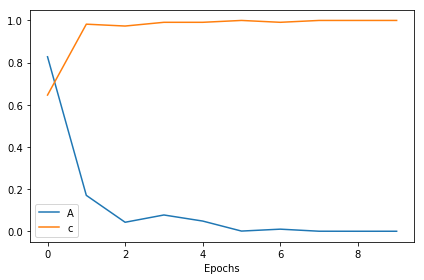

In [175]:
histdf['loss'].plot()
plt.legend("Loss")

histdf["acc"].plot()
plt.legend("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

In [ ]:
# It converges to 1.00 accuracy within 5 epochs for multiple runs , it is a stable result as everytime i rerun it 
# it achieves the same answer.

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [195]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(number_of_inputs,), activation='tanh'))
model.add(Dense(5, activation="tanh"))
model.add(Dense(2, activation="tanh"))
model.add(Dense(number_of_output_classes, activation="softmax"))
model.compile(Adam(lr=lr),
             loss="categorical_crossentropy",
              metrics=["accuracy"]
             )


In [196]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 12        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [197]:
h = model.fit(X,
              y_hat, 
              batch_size=batch_size, 
              validation_split=0.2, # Use this to assess the models overfitting
              epochs=20)

Train on 142 samples, validate on 36 samples
Epoch 1/20
142/142 [==============================] - 1s 7ms/step - loss: 1.0169 - acc: 0.5704 - val_loss: 0.9114 - val_acc: 1.0000
Epoch 2/20
142/142 [==============================] - 0s 915us/step - loss: 0.6784 - acc: 0.8380 - val_loss: 0.7518 - val_acc: 1.0000
Epoch 3/20
142/142 [==============================] - 0s 1ms/step - loss: 0.3683 - acc: 0.9718 - val_loss: 0.5139 - val_acc: 0.8611
Epoch 4/20
142/142 [==============================] - 0s 944us/step - loss: 0.1775 - acc: 0.9789 - val_loss: 0.8249 - val_acc: 0.3611
Epoch 5/20
142/142 [==============================] - 0s 315us/step - loss: 0.1274 - acc: 0.9789 - val_loss: 1.0167 - val_acc: 0.2500
Epoch 6/20
142/142 [==============================] - 0s 117us/step - loss: 0.0963 - acc: 0.9789 - val_loss: 0.6567 - val_acc: 0.5833
Epoch 7/20
142/142 [==============================] - 0s 110us/step - loss: 0.0920 - acc: 0.9859 - val_loss: 0.5181 - val_acc: 0.7222
Epoch 8/20
142/142 [=

In [198]:
inp = model.layers[0].input
out = model.layers[2].output
features_function = K.function([inp], [out])

In [220]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 13) dtype=float32>

In [221]:
features = features_function([X])[0]

In [200]:
features.shape

(178, 2)

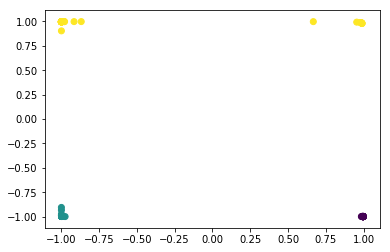

In [204]:
plt.scatter(features[:,0], features[:,1],c=y)

In [ ]:
# clearly separable using the function that the neural network has converged to.

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [205]:
from keras.layers import Input, Dense 
from keras.models import Model

In [206]:
inputs = Input(shape=(number_of_inputs, ))

In [208]:
x = Dense(8, activation="tanh")(inputs)
x = Dense(5, activation="tanh")(x)

In [209]:
second_to_last = Dense(2, activation="tanh")(x)

In [210]:
outputs = Dense(number_of_output_classes, activation="softmax")(second_to_last)

In [211]:
model = Model(inputs=inputs, outputs=outputs)

In [212]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.compile(optimizer=Adam(lr=lr),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [216]:
model.fit(X, 
          y_hat,
          batch_size=8, #small as small dataset
          validation_split=0.2,
          epochs=10
         )

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 1s 6ms/step - loss: 0.8145 - acc: 0.7676 - val_loss: 2.7491 - val_acc: 0.0000e+00
Epoch 2/10
142/142 [==============================] - 0s 275us/step - loss: 0.3342 - acc: 0.9085 - val_loss: 3.9216 - val_acc: 0.0000e+00
Epoch 3/10
142/142 [==============================] - 0s 351us/step - loss: 0.3500 - acc: 0.9014 - val_loss: 3.2187 - val_acc: 0.0000e+00
Epoch 4/10
142/142 [==============================] - 0s 181us/step - loss: 0.3719 - acc: 0.8944 - val_loss: 2.8879 - val_acc: 0.0000e+00
Epoch 5/10
142/142 [==============================] - 0s 184us/step - loss: 0.3296 - acc: 0.9085 - val_loss: 3.9352 - val_acc: 0.0000e+00
Epoch 6/10
142/142 [==============================] - 0s 332us/step - loss: 0.2759 - acc: 0.9155 - val_loss: 2.2967 - val_acc: 0.0000e+00
Epoch 7/10
142/142 [==============================] - 0s 218us/step - loss: 0.2315 - acc: 0.9155 - val_loss: 1.9498 - val_acc: 0.

In [245]:
# Plot a function of the separation of the networks

In [225]:
second_to_last

<tf.Tensor 'dense_8/Tanh:0' shape=(?, 2) dtype=float32>

In [227]:
feature_function = K.function([inputs], [second_to_last])

In [243]:
features = feature_function([X])[0]

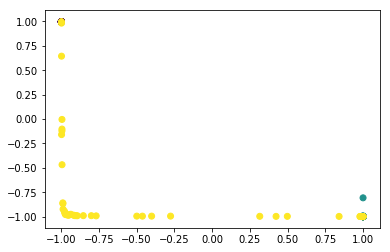

In [244]:
plt.scatter(features[:,0],features[:,1], c=y)

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size =0.3, random_state=42)

In [278]:
K.clear_session()

In [279]:
inputs = Input(shape=(number_of_inputs, ))
x = Dense(8, activation="tanh")(inputs)
x = Dense(5, activation="tanh")(x)
second_to_last = Dense(2, activation="tanh")(x)
outputs = Dense(number_of_output_classes, activation="softmax")(second_to_last)
model = Model(inputs=inputs, outputs=outputs)

In [280]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 12        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [281]:
model.compile(optimizer=Adam(lr=lr),
              loss="categorical_crossentropy",
              metrics=["accuracy"],
)

In [282]:
from keras.callbacks import EarlyStopping

# stop training if the validation loss doesn't improve

early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta=0, 
                               patience=1, 
                               verbose=1, 
                               mode='auto', 
                               baseline=None, 
                               restore_best_weights=False)


In [283]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    filepath='/tmp/keras_training/weights.hdf5', 
    verbose=1, 
    save_best_only=True)

In [284]:
from keras.callbacks import TensorBoard

tensor_board = TensorBoard(log_dir='/tmp/keras_training/logs', 
                           histogram_freq=0, 
                           batch_size=32, 
                           write_graph=True, 
                           write_grads=False, 
                           write_images=False, 
                           embeddings_freq=0, 
                           embeddings_layer_names=None, 
                           embeddings_metadata=None, 
                           embeddings_data=None, 
                           update_freq='epoch')

In [285]:
model.fit(X_train, 
          y_train,
         epochs=10,
          batch_size=8,
          validation_data=(X_test, y_test),  
          callbacks=[early_stopping, checkpointer, tensor_board]
         )

Train on 124 samples, validate on 54 samples
Epoch 1/10
124/124 [==============================] - 1s 7ms/step - loss: 0.9346 - acc: 0.5403 - val_loss: 0.6351 - val_acc: 0.7407

Epoch 00001: val_loss improved from inf to 0.63508, saving model to /tmp/keras_training/weights.hdf5
Epoch 2/10
124/124 [==============================] - 0s 850us/step - loss: 0.5828 - acc: 0.7097 - val_loss: 0.5269 - val_acc: 0.7593

Epoch 00002: val_loss improved from 0.63508 to 0.52686, saving model to /tmp/keras_training/weights.hdf5
Epoch 3/10
124/124 [==============================] - 0s 361us/step - loss: 0.4372 - acc: 0.7661 - val_loss: 0.2863 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.52686 to 0.28633, saving model to /tmp/keras_training/weights.hdf5
Epoch 4/10
124/124 [==============================] - 0s 353us/step - loss: 0.2860 - acc: 0.9516 - val_loss: 0.2009 - val_acc: 0.9444

Epoch 00004: val_loss improved from 0.28633 to 0.20090, saving model to /tmp/keras_training/weights.hdf5
E